## 1. 数据处理和分析

### 1.1 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2016-2020 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额

**！注**：数据中上报者（Reporter）可能包含国家和地区以及**中国**港澳台地区，为方便起见以下统称“国家”.

In [1]:
from src.main import Report, pd, show_cluster_list, plt


In [2]:
report_11 = Report(
    'src/data/format-2011-world-copper-2063-trade.json', '2011', 2)
report_12 = Report(
    'src/data/format-2012-world-copper-2063-trade.json', '2012', 2)
report_13 = Report(
    'src/data/format-2013-world-copper-2063-trade.json', '2013', 2)
report_14 = Report(
    'src/data/format-2014-world-copper-2063-trade.json', '2014', 2)
report_15 = Report(
    'src/data/format-2015-world-copper-2063-trade.json', '2015', 2)
report_16 = Report(
    'src/data/format-2016-world-copper-2063-trade.json', '2016', 2)
report_17 = Report(
    'src/data/format-2017-world-copper-2063-trade.json', '2017', 2)
report_18 = Report(
    'src/data/format-2018-world-copper-2063-trade.json', '2018', 2)
report_19 = Report(
    'src/data/format-2019-world-copper-2063-trade.json', '2019', 2)
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)


In [3]:
reports = [report_11, report_12, report_13, report_14, report_15,
           report_16, report_17, report_18, report_19, report_20]

report_16.data.getByCode(156)


,Code,Name
15,156,China


### 1.2 数据分析与检验*

以 2019 年数据为例，进行数据分析与检验

1. 获取贸易参与者

In [4]:
report_19.check_data()


上报进贸易记录的国家总数（不含重复）:  85
上报进贸易记录的中的贸易对象国家总数（不含重复）:  104
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  114


2. 数据检验

从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

        1. 查看中国上报的进口记录

In [5]:
report_19.view_logs_by_china()


中国上报的进口记录中，涉及出口国家的个数:  93


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
0,156,China,784,United Arab Emirates,Import,70360785,53964805,53964805.0
1,156,China,792,Turkey,Import,60658162,59904304,59904304.0
2,156,China,826,United Kingdom,Import,74307,60000,60000.0
3,156,China,834,United Rep. of Tanzania,Import,8523190,2182580,2182580.0
4,156,China,842,USA,Import,13566717,9074822,9074822.0
...,...,...,...,...,...,...,...,...
88,724,Spain,156,China,Export,746141115,633941004,633941004.0
89,792,Turkey,156,China,Export,76043743,86924900,86924900.0
90,842,USA,156,China,Export,4248920,7546469,7546469.0
91,704,Viet Nam,156,China,Export,71467,59429,59429.0


        2. 查看中国进口对象上报的对中国的出口记录

In [6]:
report_19.view_logs_about_china()


全球上报了对中国有出口记录的国家 31


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
0,56,Belgium,156,China,Import,10336,2149,2149.0
1,96,Brunei Darussalam,156,China,Import,16143,100000,100000.0
2,100,Bulgaria,156,China,Import,1850,74,74.0
3,116,Cambodia,156,China,Import,576278,1155237,1155237.0
4,124,Canada,156,China,Import,161,36,36.0
5,152,Chile,156,China,Import,10647,341,341.0
6,344,"China, Hong Kong SAR",156,China,Import,124228,334780,334780.0
7,180,Dem. Rep. of the Congo,156,China,Import,539,5,5.0
8,222,El Salvador,156,China,Import,43,3,3.0
9,251,France,156,China,Import,6,1,1.0


对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建有向加权网络是合适的，具体如下：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），贸易金额为权重，构建有向加权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

3. 对于贸易金额，若两方上报金额不一致则取两者均值
  

绘制网络（以 2020 年为例）：

In [7]:
# report_20.net.draw()


## 3. 基于连接信息熵的节点重要性

### 3.1 定义

#### 3.1.1 连接度 $A_i$
定义有向加权网络中节点的连接度为
$$
A_i = \theta\sum_{j\in \Gamma_{i\_in}}k_j + (1-\theta)\sum_{j\in \Gamma_{i\_out}}k_j
$$

其中 $\Gamma_{i\_in}$ 是指向节点 $i$ 的邻居节点集，$\Gamma_{i\_out}$ 是由节点 $i$ 指向的邻居节点集；$k_j$ 是对应节点的度；$\theta \in [0,1]$ 是参数.

具体地，有向加权网络中，定义节点 $k_j$ 的度为：

$$
\begin{aligned}
k_j &= \lambda k_i^{in} + (1-\lambda)k_i^{out} \\
    &= \lambda \sum_{i=1}^m w_{ij} + (1 - \lambda)\sum_{i=1}^m w_{ji}
\end{aligned}
$$

其中 $w_{uv}$ 表示由节点 $u$ 指向节点 $v$ 的边的权重，若该边不存在则记为 $0$；$\lambda$ 为出入边的权重参数.

具体地上式表示，在节点 $j$ 与其邻居节点的连边中，按权重求出入连边的加重和.

#### 3.1.2 连边概率 $P_{i_j}$

定义连边概率 $P_{i_j}$ 为节点 $i$ 被其邻居节点 $j$ 选择进行连边的概率：
$$
P_{i_j} = \frac{k_i}{A_j}, \ \ \ \ (j\in\Gamma_i)
$$

#### 3.1.3 连接信息熵 $E_i$

定义有向网络中连接信息熵如下：

$$
E_i = \sum\limits_{j\in\Gamma_j}\left| P_{i_j}\log_2 P_{i_j} \right|
$$

*这里取绝对值是因为 $\theta$ 加权的原因，$P_{i_j}$ 可能大于 $1$*

## 4. 实验和结果

### 4.1 求各节点的连接信息熵
根据第 3 节给出的定义，求各节点的连接信息熵，并将前 20 的连接信息熵绘图如下：

*实验中取 $\theta, \lambda = 0.7$.*

In [8]:
'''
for report in reports:
    print(report.name + '年连接信息熵分布')
    report.net.drawEntropiesBar()
'''


"\nfor report in reports:\n    print(report.name + '年连接信息熵分布')\n    report.net.drawEntropiesBar()\n"

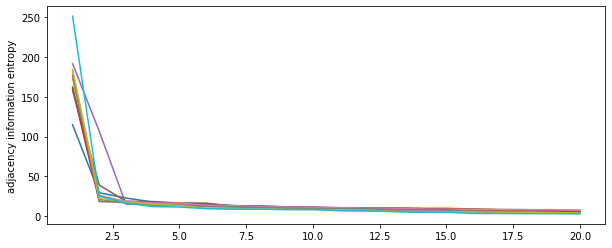

In [9]:
plt.figure(figsize=(10, 4))
report_11.draw_entropy_plot(20)
report_12.draw_entropy_plot(20)
report_13.draw_entropy_plot(20)
report_14.draw_entropy_plot(20)
report_15.draw_entropy_plot(20)

report_16.draw_entropy_plot(20)
report_17.draw_entropy_plot(20)
report_18.draw_entropy_plot(20)
report_19.draw_entropy_plot(20)
report_20.draw_entropy_plot(20)
plt.show()


从上表可以看出，中国、欧盟等铜贸易大国位列前茅，且前二十名均为贸易和工业水平发达的国家，说明使用“连接信息熵”来衡量铜贸易网络节点的重要性具备一定的合理性.

### 4.2 层次聚类
对个节点的信息熵进行层次聚类，选择聚类数为 6；并为每个节点设置聚类标签，按熵值从大到小标记为 1 - 6

### 4.3 选取属性并进行离散化划分

选取以下属性，并选择聚类层数：

* IS：入强度, 6 层，反应进口贸易总额
* OS: 出强度，6 层，反应出口贸易总额
* DC: 度中心性，6 层，反应贸易伙伴的数量
* BC: 中介中心性，6 层，反应在贸易网络中的枢纽性质（不考虑权重）
* CC: 接近中心性，6 层，反应与其他贸易者之间的平均距离（不考虑权重）

属性值由大到小标记为 1-6

In [9]:
cluster_list = show_cluster_list(reports, label_name="E")


In [10]:
cluster_list


,code,code,code,code,code,code,code,code,code,code
E,,,,,,,,,,
1,156,156,156,156,156,156,156,156,156,156
2,410,710,410,"100,724",528,528,100,"410,100",724,724
3,710,"276,100,604,410","699,484,276,100","276,398,410,152,604,842,246,608","100,152,276,842,410,604,724","724,410,124,100","724,152,784","152,724,604,757",152,124
4,"56,90,276,604","752,724,246,842,等14项","124,152,604,724,842,792,752,36","702,704,579,191,392,36,699,124",268,"604,152,36,710,等12项","604,410,246,699,等16项","710,398,616,392,528,842,376,276","100,604","410,458"
5,"842,100,608,894,等17项","344,484,124,608,76,784,894","417,392,710,894,76,608,826","710,894,76,887,484","36,124,398,699,等10项","246,76","76,608,710,704,484","76,36,699,124,等11项","410,757,56,842,等15项","842,860,392,528,等10项"
6,"643,752,516,826,等100项","643,516,757,398,等99项","528,616,246,251,等101项","56,643,757,752,等98项","608,710,616,484,等146项","484,608,894,360,等94项","894,643,458,616,等101项","360,702,643,458,等97项","381,528,484,246,等94项","246,699,484,100,等95项"


In [11]:
writer = pd.ExcelWriter('cluster_list.xlsx')
cluster_list.to_excel(writer, float_format='%.5f')
writer.save()


In [12]:
report_19.show_nodes_attribute()


,code,name,IS,OS,DC,BC,CC,E
0,156,China,1,6,1,1,1,1
1,724,Spain,4,5,3,4,2,2
2,152,Chile,6,2,2,3,2,3
3,100,Bulgaria,4,6,4,5,3,4
4,604,Peru,6,1,3,5,4,4
...,...,...,...,...,...,...,...,...
109,591,Panama,6,6,6,6,6,6
110,598,Papua New Guinea,6,6,6,6,6,6
111,620,Portugal,6,6,5,6,4,6
112,31,Azerbaijan,6,6,6,6,4,6


上表以 2019 年数据，展示了各个节点的 5 个条件属性及 1 个决策属性所在的层次序号（1-6）

### 4.5 生成决策树

使用 ID3 算法生成决策树

In [13]:
for report in reports:
    report.decision_tree
    report.show_dt_accuracy()
    report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')


决策树的正确率： 95.16129032258065 %
决策树的正确率： 94.44444444444444 %
决策树的正确率： 99.18032786885246 %
决策树的正确率： 96.72131147540983 %
决策树的正确率： 98.79518072289156 %
决策树的正确率： 95.6140350877193 %
决策树的正确率： 93.7007874015748 %
决策树的正确率： 95.9349593495935 %
决策树的正确率： 95.6140350877193 %
决策树的正确率： 96.36363636363636 %


决策树（2019）：

![decistion_tree](outputs/decision_tree.png)

根据决策树生成决策表：

In [14]:
for report in reports:
    report.nodes
    report.set_attribute_probability()
    report.decision_list


{'layer': 6}


KeyError: 'cluster'

In [ ]:
pd.DataFrame(report_19.decision_list)[
    report_19.attribute_names + ['label']].sort_values('label')


,IS,OS,DC,BC,CC,label
0,NaN,NaN,1,NaN,NaN,1
1,NaN,1.0,2,NaN,NaN,2
2,NaN,2.0,2,NaN,NaN,2
3,NaN,3.0,2,NaN,NaN,2
5,NaN,5.0,2,NaN,NaN,2
...,...,...,...,...,...,...
39,1.0,NaN,5,NaN,NaN,6
64,6.0,NaN,5,6.0,1.0,6
65,6.0,1.0,5,6.0,2.0,6
67,6.0,3.0,5,6.0,2.0,6


上表展示了决策树中的 86 条决策规则中各条件属性和决策属性的取值，NaN 表示该条件属性无需判断.

例如若某一结点 DC 属性值为 1，则无需判断其余属性即可得到该节点的决策属分区为 1 的决策结论. 事实上，仅有中国的 DC 为 1，且仅有中国决策属性为 1，所以继续判断其余属性时多余的.

### 4.6 层次风险模型

1. 条件属性的概率分布

$$
p_{jA_i} = \frac{\#jA_i}{N}
$$

其中 $A_i$ 表示条件属性，$jA_i$ 表示条件属性 $A_i$ 的属性取值. $\#jA_i$ 表示属性 $A_i$ 取 $j$ 时的样本数，$N$ 表示总样本数。


下面计算各个条件属性的概率分布：

In [ ]:
for report in reports:
    report.set_attribute_probability()


2. 决策规则的概率分布

$$
    P_{\text{Rule}l} = p_{jA_i}\cdots p_{jA_p}
$$

其中，$p_{jA_k}$ 表示在决策规则 $l$ 中对应的各条件属性 $A_k$ 的取值为 $j$ 的概率.

*这里将各条件属性的分布近似看做为相互独立，即某条件属性的取值不受其他条件属性取值的影响*

下面计算各个决策规则的概率分布：

下面绘制决策规则的概率分布柱状图：

2016年决策路径概率分布
[[0.008264462809917356], [0.008264462809917356], [2.4986135284033322e-05, 0.0001249306764201666, 0.0007745701938050329, 7.495840585209997e-05, 0.0006496395173848664], [0.0024588484393142547, 2.201448327209732e-05, 0.0001100724163604866, 0.0006824489814350169, 6.604344981629197e-05, 0.0005723765650745303], [0.00020490403660952122, 0.00020490403660952122, 0.0006147121098285637, 0.00020490403660952122, 0.021105115770780686, 0.0008879174919745919, 0.0008879174919745919, 0.0012107965799653525, 0.0008879174919745919, 0.010655009903695103, 0.000755830592342008, 0.001511661184684016, 0.000755830592342008, 0.0001561633455252083, 0.0001561633455252083, 0.0003123266910504166, 0.0001561633455252083, 0.0007808167276260414, 0.06651309212609671, 0.020490403660952124], [0.0013742374406218326, 0.01733413135329812, 0.23140495867768596, 0.005122600915238031, 0.010245201830476062, 0.005122600915238031, 0.12806502288095076, 0.0037255279383549313, 0.018627639691774656, 0.20490403660952122, 0.1

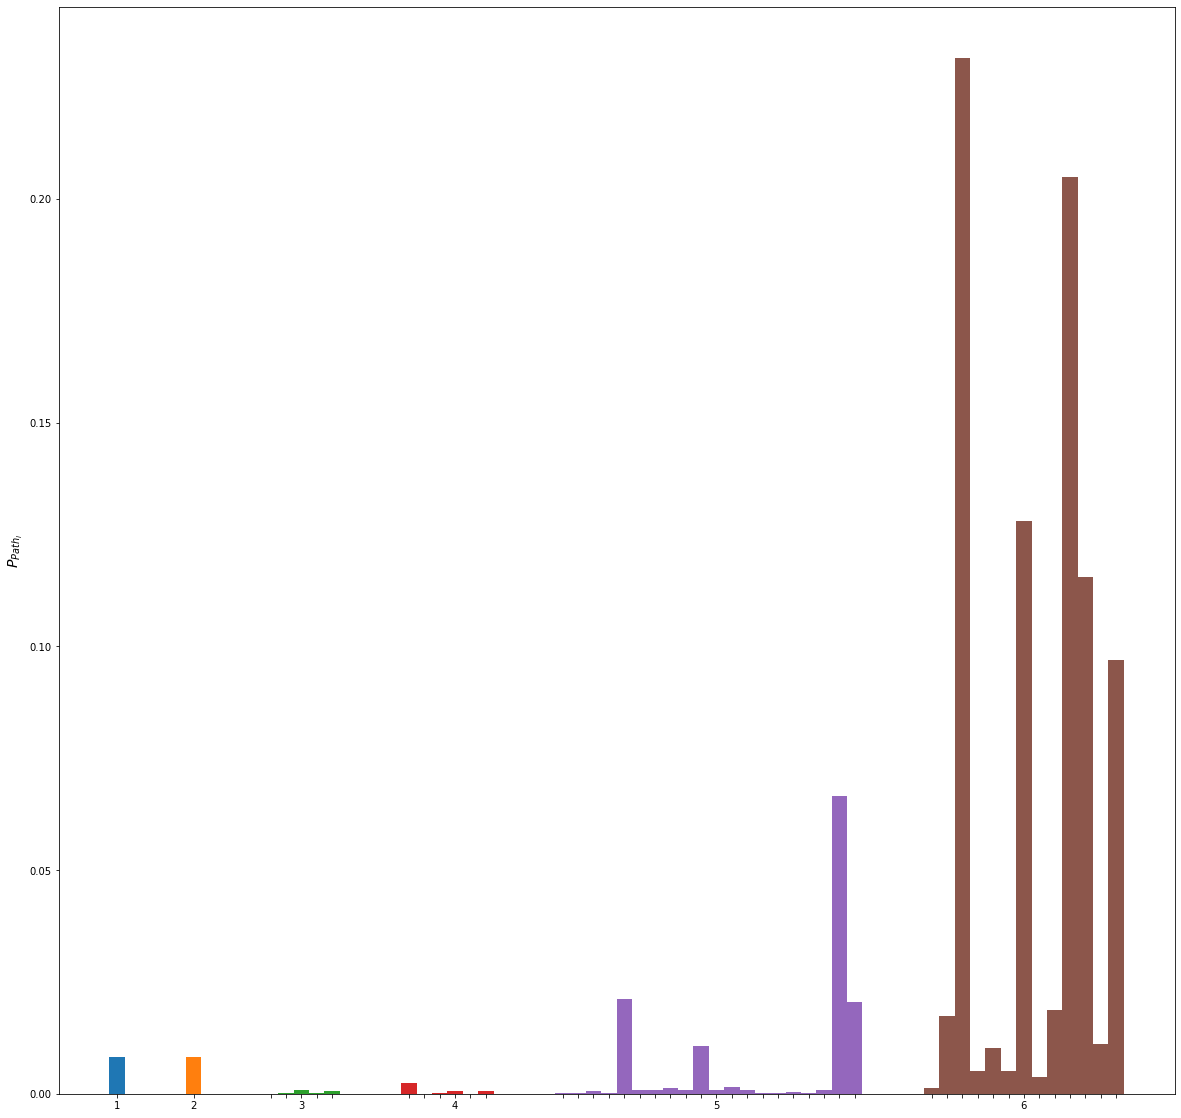

2017年决策路径概率分布
[[0.007518796992481203], [0.00011306461642828876, 0.00011306461642828876, 0.00011306461642828876, 0.00022612923285657752, 0.00045225846571315503], [0.00022612923285657752, 0.00022612923285657752, 0.00022612923285657752, 0.00045225846571315503, 0.00021082725469335044, 0.00021082725469335044, 0.00021082725469335044, 0.0014757907828534531, 0.025299270563202053, 0.0024874215614223527], [0.0009045169314263101, 0.0006218553903555882, 0.0006218553903555882, 0.0012437107807111763, 0.0005797749504067137, 0.0005797749504067137, 0.0005797749504067137, 0.004058424652846996], [0.014020012437107805, 0.0006324817640800514, 0.0006218553903555882, 0.006800367839356943], [0.0017393248512201412, 0.0005231052184120726, 0.019877998299658757, 0.02249352439171912, 0.003661736528884508, 0.01621626177077425, 0.0020351630957091975, 0.0020351630957091975, 0.004070326191418395, 0.010175815478545987, 0.0001836237379587246, 0.0023871085934634197, 0.0069777020424315345, 0.007895820732225157, 0.00128536

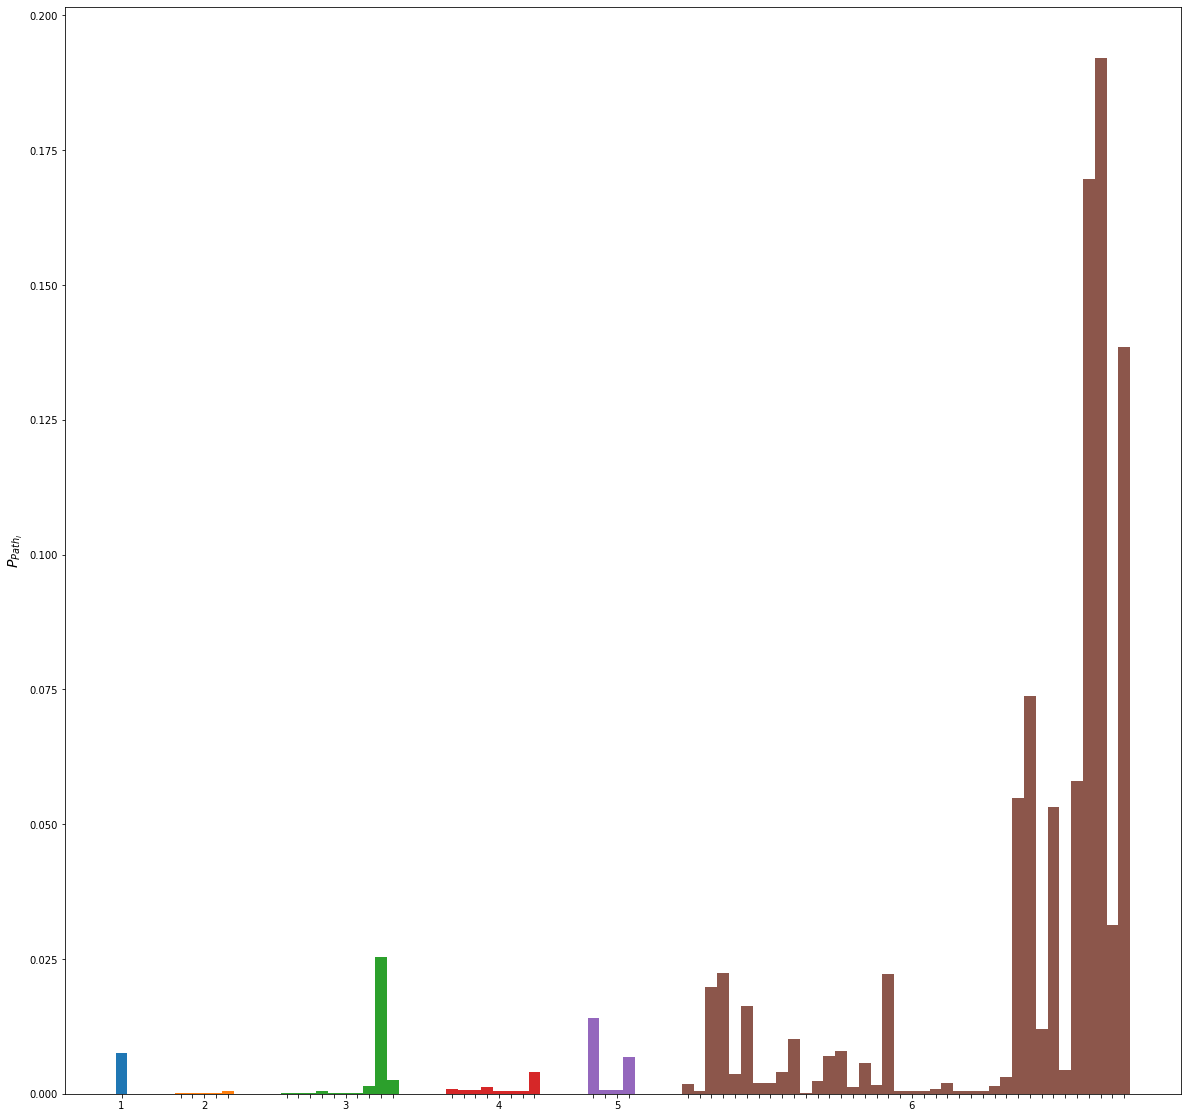

2018年决策路径概率分布
[[0.0078125], [0.00018310546875, 0.0003662109375, 0.000732421875, 0.02105712890625], [0.00018310546875, 0.001220703125, 0.0001430511474609375], [0.0006103515625, 0.0006103515625, 0.0018310546875, 0.0006103515625, 0.00057220458984375, 0.06580352783203125, 0.00743865966796875, 0.0005102157592773438], [0.00091552734375, 0.00057220458984375, 0.0011444091796875, 1.7881393432617188e-05, 0.0007510185241699219, 0.0009477138519287109, 5.364418029785156e-05, 0.00037550926208496094, 0.00286102294921875, 6.198883056640625e-05, 6.198883056640625e-05, 0.0001239776611328125, 0.00018596649169921875, 6.198883056640625e-05], [0.0006103515625, 0.0006103515625, 0.001220703125, 0.00244140625, 0.0005102157592773438, 0.0010204315185546875, 0.0015306472778320312, 0.0005102157592773438, 0.06122589111328125, 0.0009765625, 0.0078125, 0.0003204345703125, 0.0003204345703125, 0.000640869140625, 0.00128173828125, 0.0016021728515625, 0.0002878904342651367, 0.0002878904342651367, 0.0005757808685302734, 0

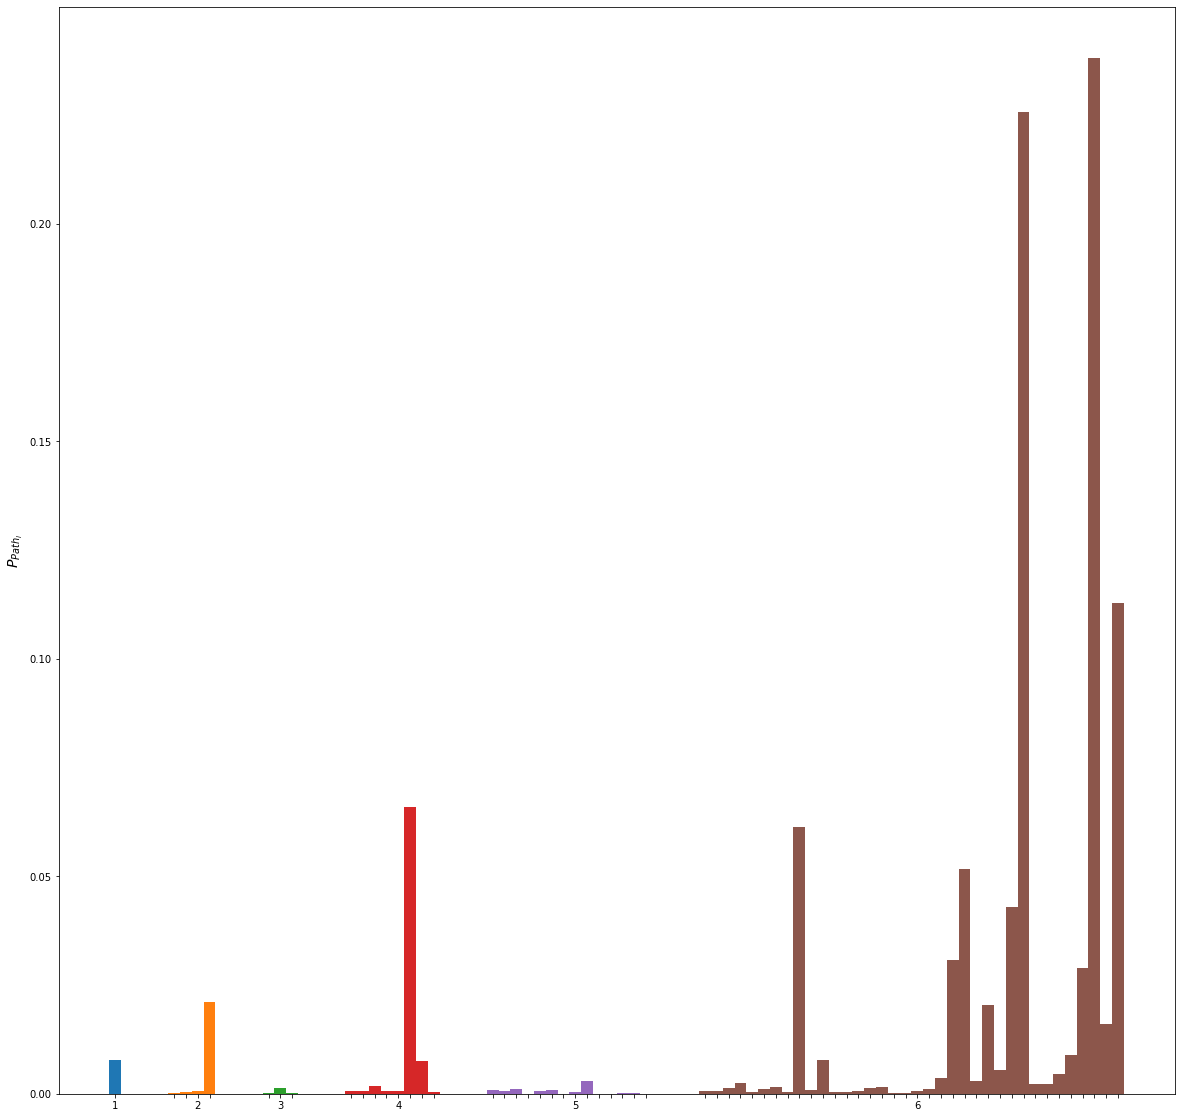

2019年决策路径概率分布
[[0.008403361344537815], [0.0001412329637737448, 0.0001412329637737448, 0.0001412329637737448, 0.0005649318550949792, 0.015253160087564437], [9.494653026806373e-05], [0.0005649318550949792, 0.0005649318550949792, 0.0011298637101899583, 1.4241979540209558e-05, 1.4241979540209558e-05, 1.4241979540209558e-05, 7.120989770104779e-05, 0.00017090375448251469, 0.007909045971329708, 0.053668526234023024, 2.3736632567015933e-05, 0.000356049488505239, 0.0007833088747115259, 0.0002848395908041912, 0.0005934158141753983, 0.00176541204717181, 2.0944087559131703e-05, 0.0003141613133869755, 0.0006911548894513463, 0.0006911548894513463, 0.0002513290507095804, 0.0005236021889782926, 0.00017278872236283657, 0.0025918308354425487, 0.005702027837973607, 0.002073464668354039, 0.004319718059070915, 0.01596169530110477], [0.0014099559744807464, 1.8989306053612745e-05, 1.8989306053612745e-05, 1.8989306053612745e-05, 0.00022787167264335295, 0.0018799412993076618, 0.0005649318550949792, 0.000564931

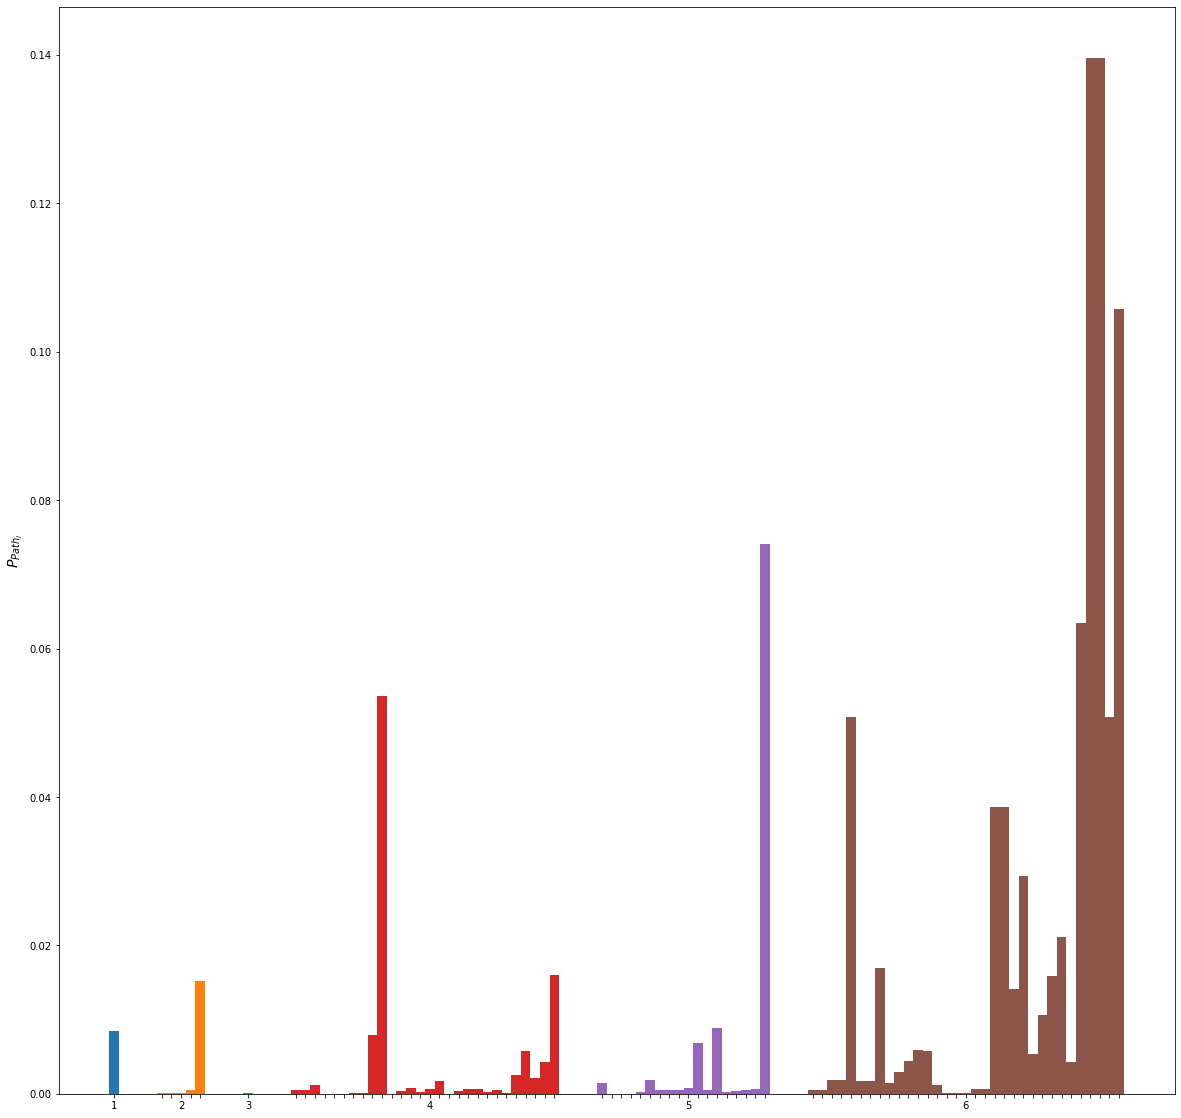

2020年决策路径概率分布
[[0.00847457627118644], [0.00847457627118644, 0.00014363688595231256, 0.00014363688595231256, 0.0002872737719046251, 0.00014363688595231256, 0.001005458201666188, 0.004524561907497846, 0.0023225354101441727], [0.0006463659867854065], [0.015225509910945132, 0.001292731973570813, 0.0011612677050720863, 0.0021545532892846882, 0.0019902229536612795], [0.0005806338525360432, 0.0021545532892846882], [0.0006463659867854065, 0.0006463659867854065, 0.0005806338525360432, 0.0005806338525360432, 0.0632890899264287, 0.0021545532892846882, 0.0043091065785693765, 0.008618213157138753, 0.0019902229536612795, 0.003980445907322559, 0.0019902229536612795, 0.013931560675628958, 0.0017878273990516581, 0.014302619192413265, 0.0006514964250781465, 0.0006514964250781465, 0.0019544892752344396, 0.001302992850156293, 0.002605985700312586, 0.06971011748336169, 0.05899830416870471, 0.0071513095962066325, 0.051846994572498084, 0.005386383223211721, 0.043091065785693765, 0.23161447859810397, 0.177750

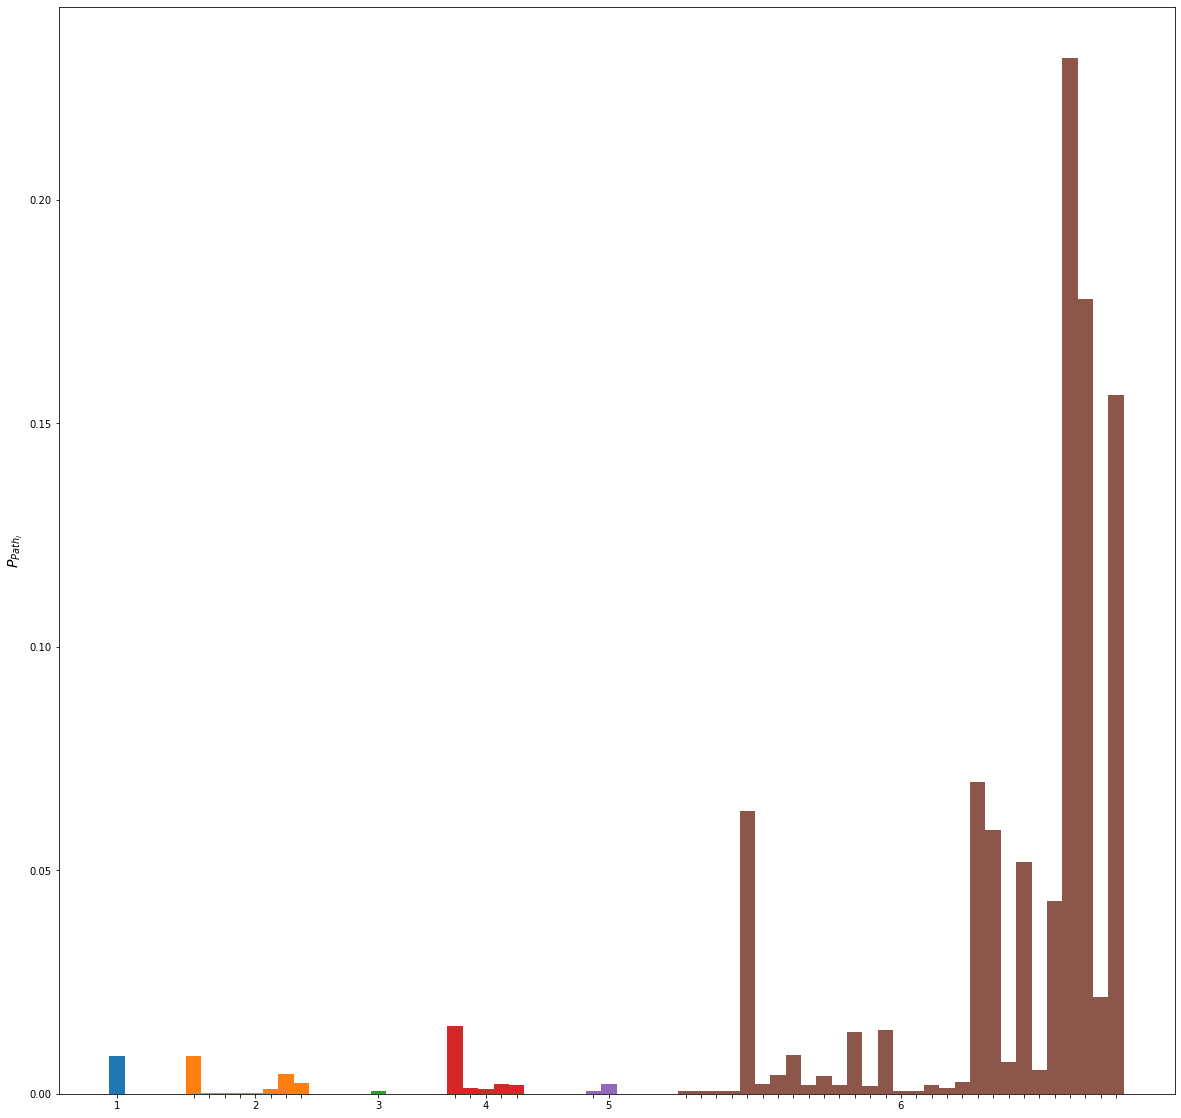

In [ ]:
for report in reports:
    report.decision_probability_bar()


以第一个图为例，使用柱状图的形式展示了 86 条决策规则的概率值，并且按照决策规则的最终决策属性的取值进行了分区. 例如，决策结果为 1 的决策规则只有 1 条，其概率约为 $0.008403$，即图中从左数第一根柱形图.

3. 节点脆弱性风险

节点脆弱性在对应离散分区下的层次风险：

$$
  P_j = \sum_{l=1}^MP_{\text{Rule}l}(j_{A_n})
$$

$P_j$ 表示了对于任意节点，通过决策树，做出决策属性为 $j$ 的概率，即各个决策属性为 $j$ 的决策规则的概率求和.
  

In [ ]:
for report in reports:
    report.get_hierarchical_risk()
    print(report.name + '年层次风险分布')
    report.hierarchical_risk_bar()


KeyError: 'p'

上图展示了各个决策属性的概率分布，其中决策属性为 $1,2,3$ 的概率值较小，决策属性为 $4,5,6$ 的概率较大，决策属性为 $6$ 的概率尤其大.

In [ ]:
import numpy as np

xs = np.arange(10) + 1 + 2
xs = [[1, 2], [2, 3]]


In [ ]:
[x for j in xs for x in j]


[1, 2, 2, 3]

In [ ]:
[x for j in xs for x in j]


[1, 2, 2, 3]

In [ ]:
res = []
for j in xs:
    for x in j:
        res.append(x)

res


[1, 2, 2, 3]

In [ ]:
ps = [[0.008264462809917356], [0.008264462809917356], [2.4986135284033322e-05, 0.0001249306764201666, 0.0007745701938050329, 7.495840585209997e-05, 0.0006496395173848664], [0.0024588484393142547, 2.201448327209732e-05, 0.0001100724163604866, 0.0006824489814350169, 6.604344981629197e-05, 0.0005723765650745303], [0.00020490403660952122, 0.00020490403660952122, 0.0006147121098285637, 0.00020490403660952122, 0.021105115770780686, 0.0008879174919745919, 0.0008879174919745919, 0.0012107965799653525, 0.0008879174919745919,
                                                                                                                                                                                                                                                                                                                         0.010655009903695103, 0.000755830592342008, 0.001511661184684016, 0.000755830592342008, 0.0001561633455252083, 0.0001561633455252083, 0.0003123266910504166, 0.0001561633455252083, 0.0007808167276260414, 0.06651309212609671, 0.020490403660952124], [0.0013742374406218326, 0.01733413135329812, 0.23140495867768596, 0.005122600915238031, 0.010245201830476062, 0.005122600915238031, 0.12806502288095076, 0.0037255279383549313, 0.018627639691774656, 0.20490403660952122, 0.11549136608900286, 0.011176583815064794, 0.09686372639722822]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


[5, 10, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70] [1, 2, '', '', 3, '', '', '', '', '', 4, '', '', '', '', '', '', '', '', '', '', '', '', 5, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 6, '', '', '', '', '', '']


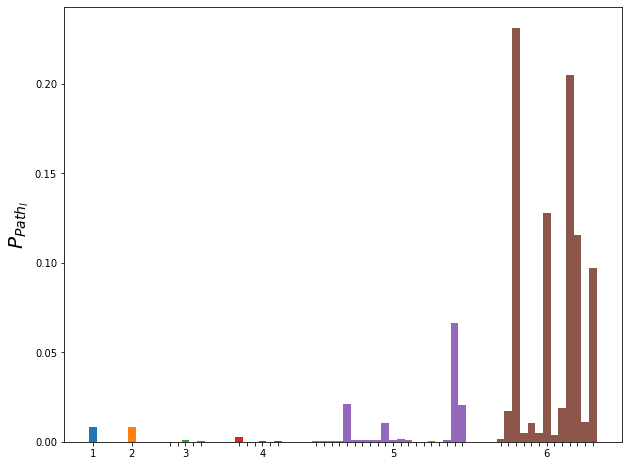

In [ ]:
plt.figure(figsize=(10, 8))

width = 1
group_gap = 5

# fig, ax = plt.subplots()

last_index = 0
ind = []
xs = []

for i in range(0, 6):
    group_len = len(ps[i])

    x = np.arange(group_len) + last_index + group_gap
    xs.append(x)

    last_index = x[-1]

    plt.bar(x, ps[i], width)


ind = [x for j in xs for x in j]

x_labels = ['' for _ in range(len(ind))]

former_index = 0
for i, x in enumerate(xs):
    x_labels[former_index + int(len(x) / 2)] = i + 1
    former_index += len(x)

# plt.xticklabels(x_labels, fontsize=14)

plt.ylabel(r"$P_{Path_l}$", fontsize=20)
# plt.xticks(ind, [i + 1 for i in range(len(xs))])
plt.xticks(ind, x_labels)

print(ind, x_labels)

plt.show()


In [ ]:
a = -1
b = 2
abs(a)


1

In [ ]:
import numpy as np
print(np.arange(1, 20, 2))


[ 1  3  5  7  9 11 13 15 17 19]
